In [260]:
#importing panda libraries
#pandaslibrary works with tabular data called dataframe for data manipulation
import pandas as pd

In [261]:
#importing file with extension and assigned to the dataset variable
dataset=pd.read_csv("Salary_Data.csv")

In [262]:
#Below shows the excel imported and assigned to the variable
#excel data consistes of years of exp and salary and end result to predict the salary for the desired experience
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [263]:
#assignment of column in independant variable
independant=dataset.iloc[:,0:1].values

In [264]:
#assignment of column in dependant variable
dependant=dataset.iloc[:,1:2].values

In [265]:
#import scikit learn model by selection
#output gives combined result as per variables included in train_test-split with random selection
from sklearn.model_selection import train_test_split
train_test_split(independant, dependant, test_size=0.3, random_state=0)

[array([[ 7.9],
        [ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]),
 array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3]]),
 array([[101302.],
        [ 56642.],
        [ 66029.],
        [ 64445.],
        [ 61111.],
        [113812.],
        [ 91738.],
        [ 46205.],
        [121872.],
        [ 60150.],
        [ 39891.],
        [ 81363.],
        [ 93940.],
        [ 57189.],
        [ 54445.],
        [105582.],
        [ 43525.],
        [ 39343.],
        [ 98273.],
        [ 67938.],
        [ 56957.]]),
 array([[ 37731.],
        [122391.],
        [ 57081.],
        [ 63218.],
        [116969.],
        [109431.],
 

In [266]:
#to avoid output as shown above we need to assign as below as per slope formula
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independant, dependant, test_size=0.3, random_state=0)


In [267]:
#Model creation-uses below input for Learning Phase
#LinearRegression() class where all procedures is assigned to variable regressor-Initialise the Model
#fit() function is fundamental step where learning happens- Training the Model
#fit() function requires parameters which is input and determine coefficient(slope) & intercept(bias)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [268]:
#to view weight
weight=regressor.coef_
weight
print(f'Weight: {weight}')

Weight: [[9360.26128619]]


In [269]:
# to view bias
bias=regressor.intercept_
bias
print(f'Bias: {bias}')

Bias: [26777.3913412]


In [270]:
#To perform evaluation metric for X_test-Test the input from test data which is not included in train data
#To get predicted output predict the input test data using `
y_pred = regressor.predict(X_test)

In [271]:
#To perform evaluation
#(coefficient of determination) regression score function.
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)

In [272]:
#output below indicates close to 1 which is good and close to 0 is bad
r_score
print(f'R2_score: {r_score}')

R2_score: 0.9740993407213511


In [273]:
#To save the model assign the filename
import pickle
filename = "final_model_linear.sav"

In [274]:
#To dump the model in the filename we use below, as in previous step filename only assigned
pickle.dump(regressor,open(filename,'wb'))

In [275]:
#To load the model from filename and store in result and ignore the error
loaded_model = pickle.load(open("final_model_linear.sav",'rb'))
result = loaded_model.predict([[15]])

In [276]:
#to preview the prediction for a 15year experience
print(f"Prediction for 15: {result}")

Prediction for 15: [[167181.3106341]]


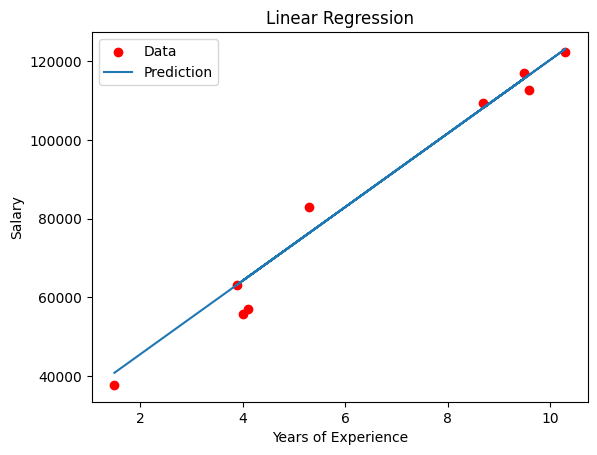

In [277]:
from matplotlib import pyplot as plt
plt.scatter(X_test,y_test,color='red',label='Data')
plt.plot(X_test,regressor.predict(X_test),label='Prediction')
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()